<a href="https://colab.research.google.com/github/rajayush01/QR-Code-Authentication-Detecting-Original-vs.-Counterfeit-Prints/blob/main/Alemeno.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Data Exploration and Analysis**

In [56]:
import cv2
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from skimage.feature import local_binary_pattern
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

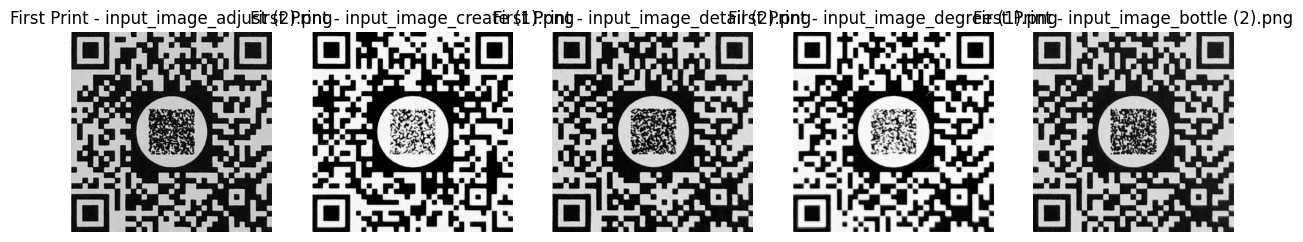

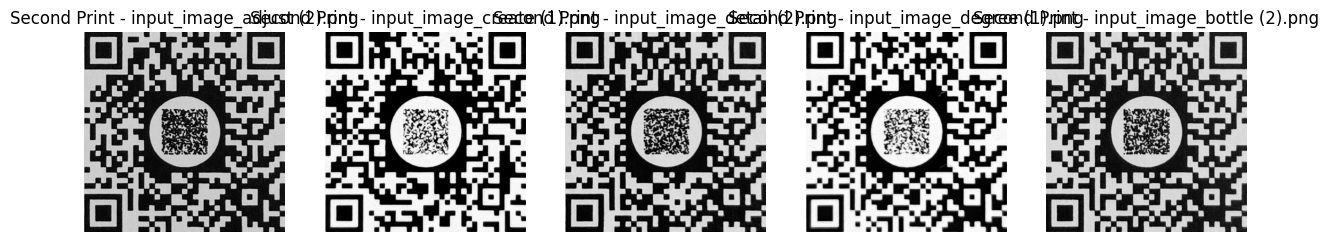

In [57]:
def display_images(img_folder, label, num_samples=5):
    imgs = os.listdir(img_folder)[:num_samples]
    plt.figure(figsize=(15, 5))

    for i, img_name in enumerate(imgs):
        img_path = os.path.join(img_folder, img_name)
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        plt.subplot(1, num_samples, i + 1)
        plt.imshow(img, cmap='gray')
        plt.title(f"{label} - {img_name}")
        plt.axis('off')

    plt.show()

first_print_path = '/content/drive/MyDrive/Assignment Data/First Print'
second_print_path = '/content/drive/MyDrive/Assignment Data/First Print'

display_images(first_print_path, 'First Print')
display_images(second_print_path, 'Second Print')


In [58]:
def calculate_image_statistics(img_folder):
    img_files = os.listdir(img_folder)
    stats = {'Filename': [], 'Mean': [], 'Variance': [], 'Skewness': []}

    for img_name in img_files:
        img_path = os.path.join(img_folder, img_name)
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

        mean_val = np.mean(img)
        var_val = np.var(img)
        skew_val = pd.Series(img.flatten()).skew()

        stats['Filename'].append(img_name)
        stats['Mean'].append(mean_val)
        stats['Variance'].append(var_val)
        stats['Skewness'].append(skew_val)

    return pd.DataFrame(stats)

first_print_stats = calculate_image_statistics(first_print_path)
second_print_stats = calculate_image_statistics(second_print_path)

print("First Print Statistics:\n", first_print_stats.describe())
print("\nSecond Print Statistics:\n", second_print_stats.describe())


First Print Statistics:
              Mean      Variance    Skewness
count  100.000000    100.000000  100.000000
mean   121.614789  10491.345184   -0.023804
std     13.444310   3180.949456    0.147701
min     97.930936   4865.569477   -0.226822
25%    108.200246   8045.308651   -0.152203
50%    128.782967  12248.632013   -0.095247
75%    132.711928  12909.048625    0.107138
max    137.937328  14463.000632    0.307929

Second Print Statistics:
              Mean      Variance    Skewness
count  100.000000    100.000000  100.000000
mean   121.614789  10491.345184   -0.023804
std     13.444310   3180.949456    0.147701
min     97.930936   4865.569477   -0.226822
25%    108.200246   8045.308651   -0.152203
50%    128.782967  12248.632013   -0.095247
75%    132.711928  12909.048625    0.107138
max    137.937328  14463.000632    0.307929


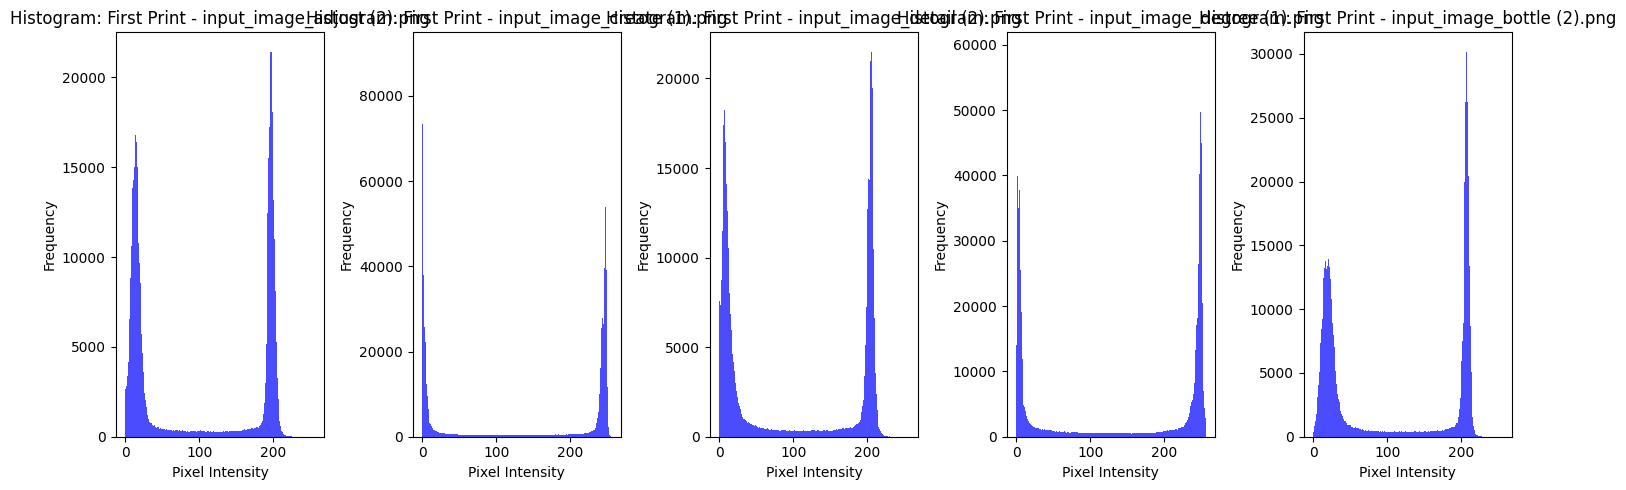

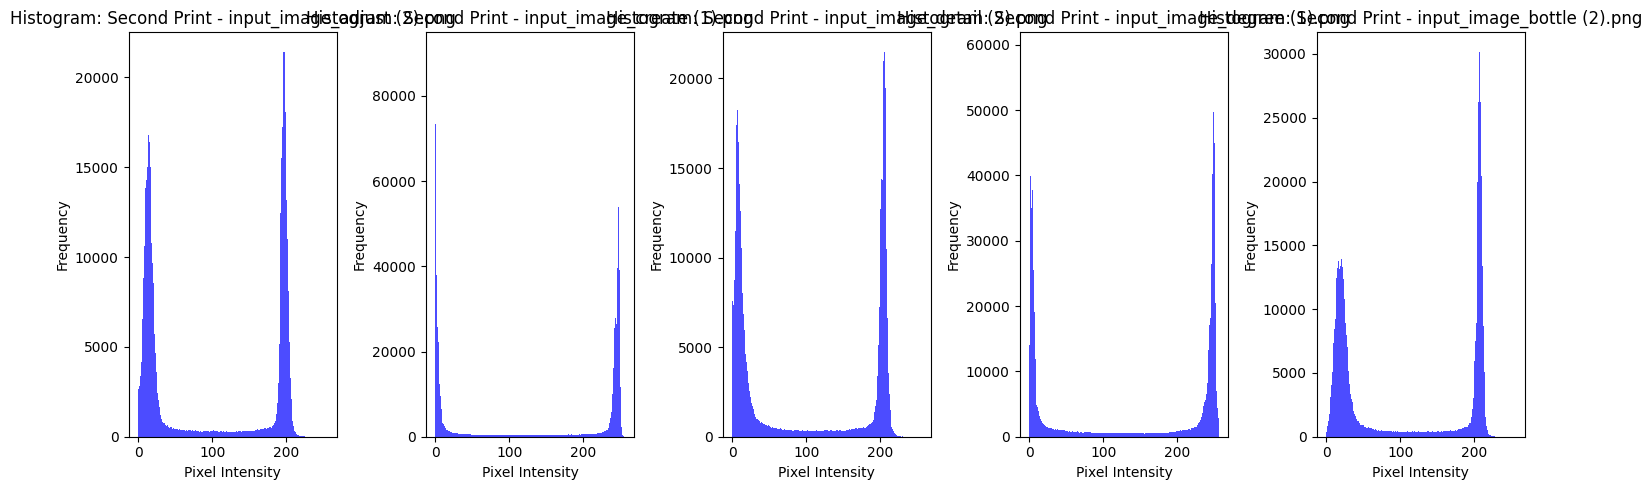

In [59]:
def plot_histogram(img_folder, label, num_samples=5):
    imgs = os.listdir(img_folder)[:num_samples]
    plt.figure(figsize=(15, 5))

    for i, img_name in enumerate(imgs):
        img_path = os.path.join(img_folder, img_name)
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

        plt.subplot(1, num_samples, i + 1)
        plt.hist(img.ravel(), bins=256, range=[0, 256], color='blue', alpha=0.7)
        plt.title(f"Histogram: {label} - {img_name}")
        plt.xlabel('Pixel Intensity')
        plt.ylabel('Frequency')

    plt.tight_layout()
    plt.show()

plot_histogram(first_print_path, 'First Print')
plot_histogram(second_print_path, 'Second Print')


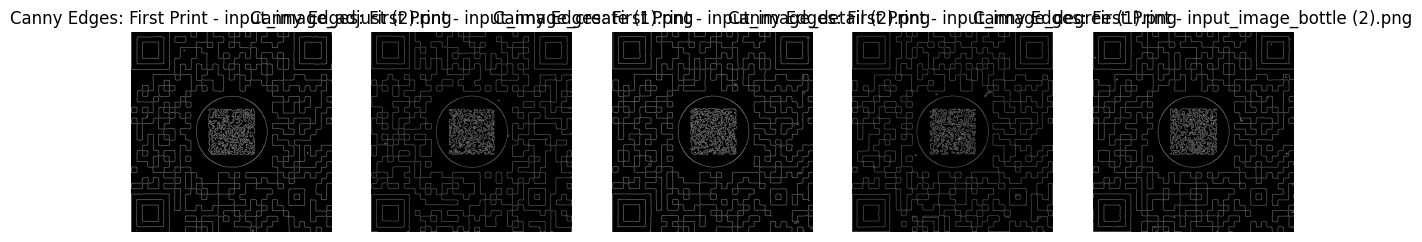

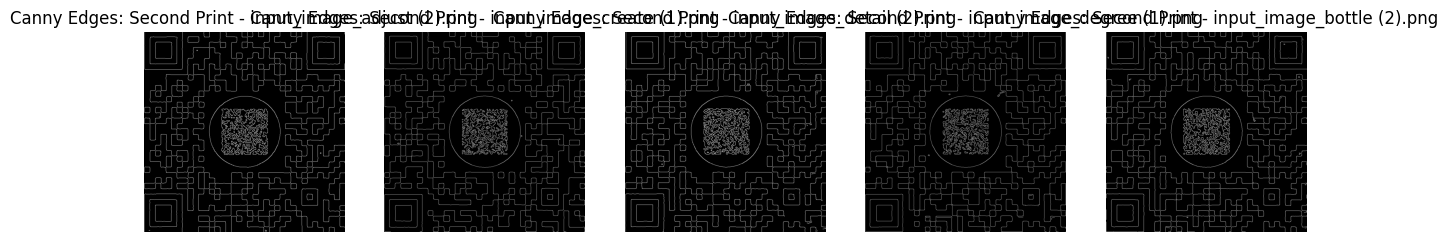

In [60]:
def canny_edge_detection(img_folder, label, num_samples=5):
    imgs = os.listdir(img_folder)[:num_samples]
    plt.figure(figsize=(15, 5))

    for i, img_name in enumerate(imgs):
        img_path = os.path.join(img_folder, img_name)
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

        edges = cv2.Canny(img, 100, 200)

        plt.subplot(1, num_samples, i + 1)
        plt.imshow(edges, cmap='gray')
        plt.title(f"Canny Edges: {label} - {img_name}")
        plt.axis('off')

    plt.show()

canny_edge_detection(first_print_path, 'First Print')
canny_edge_detection(second_print_path, 'Second Print')


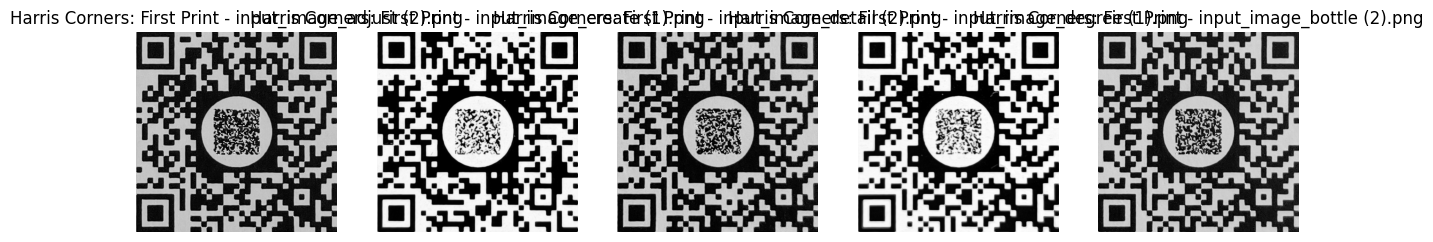

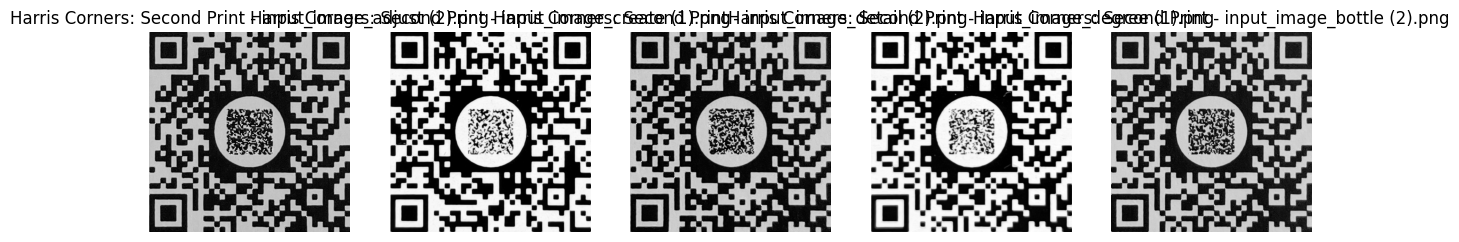

In [61]:
def harris_corner_detection(img_folder, label, num_samples=5):
    imgs = os.listdir(img_folder)[:num_samples]
    plt.figure(figsize=(15, 5))

    for i, img_name in enumerate(imgs):
        img_path = os.path.join(img_folder, img_name)
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

        img_float32 = np.float32(img)
        corners = cv2.cornerHarris(img_float32, blockSize=2, ksize=3, k=0.04)

        img[corners > 0.01 * corners.max()] = [255]

        plt.subplot(1, num_samples, i + 1)
        plt.imshow(img, cmap='gray')
        plt.title(f"Harris Corners: {label} - {img_name}")
        plt.axis('off')

    plt.show()

harris_corner_detection(first_print_path, 'First Print')
harris_corner_detection(second_print_path, 'Second Print')


# **Feature Engineering**

In [62]:
def extract_histogram_features(img):
    hist = cv2.calcHist([img], [0], None, [256], [0, 256])
    hist = cv2.normalize(hist, hist).flatten()
    return hist

In [63]:
def extract_lbp_features(img, radius=3, n_points=8 * 3):
    lbp = local_binary_pattern(img, n_points, radius, method='uniform')
    (hist, _) = np.histogram(lbp.ravel(),
                             bins=np.arange(0, n_points + 3),
                             range=(0, n_points + 2))
    hist = hist.astype('float')
    hist /= (hist.sum() + 1e-6)
    return hist

In [64]:
def extract_sift_features(img):
    sift = cv2.SIFT_create()
    keypoints, descriptors = sift.detectAndCompute(img, None)
    if descriptors is None:
        return np.zeros(128)
    return np.mean(descriptors, axis=0)

In [65]:
def extract_all_features(img_folder, label):
    img_files = os.listdir(img_folder)
    features = []
    labels = []

    for img_name in img_files:
        img_path = os.path.join(img_folder, img_name)
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

        hist_features = extract_histogram_features(img)
        lbp_features = extract_lbp_features(img)
        sift_features = extract_sift_features(img)

        feature_vector = np.hstack([hist_features, lbp_features, sift_features])

        features.append(feature_vector)
        labels.append(label)

    return np.array(features), np.array(labels)

first_print_path = '/content/drive/MyDrive/Assignment Data/First Print'
second_print_path = '/content/drive/MyDrive/Assignment Data/First Print'

first_features, first_labels = extract_all_features(first_print_path, label=0)  # 0 for First Print
second_features, second_labels = extract_all_features(second_print_path, label=1)  # 1 for Second Print


In [66]:
X = np.vstack([first_features, second_features])
y = np.hstack([first_labels, second_labels])

os.makedirs('data', exist_ok=True)

np.save('data/X_features.npy', X)
np.save('data/y_labels.npy', y)

print("Feature extraction completed. Shape of feature set:", X.shape)

Feature extraction completed. Shape of feature set: (200, 410)


In [67]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=50)
X_pca = pca.fit_transform(X_scaled)

np.save('data/X_pca.npy', X_pca)
print("PCA completed. Reduced feature shape:", X_pca.shape)


PCA completed. Reduced feature shape: (200, 50)


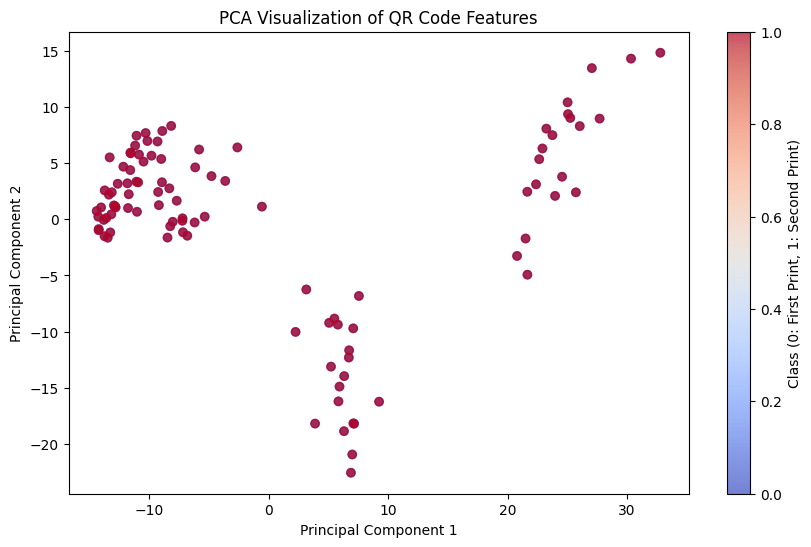

In [68]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='coolwarm', alpha=0.7)
plt.title('PCA Visualization of QR Code Features')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Class (0: First Print, 1: Second Print)')
plt.show()

# Model Development

In [69]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical


In [70]:
X = np.load('data/X_features.npy')
y = np.load('data/y_labels.npy')

X = np.load('data/X_pca.npy')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training data shape: {X_train.shape}, Testing data shape: {X_test.shape}")


Training data shape: (160, 50), Testing data shape: (40, 50)


Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        21
           1       0.12      0.16      0.14        19

    accuracy                           0.07        40
   macro avg       0.06      0.08      0.07        40
weighted avg       0.06      0.07      0.07        40



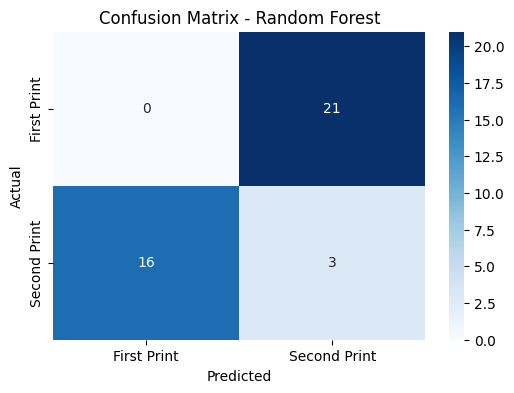

In [71]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

rf_preds = rf_model.predict(X_test)
print("Random Forest Classification Report:\n", classification_report(y_test, rf_preds))

cm_rf = confusion_matrix(y_test, rf_preds)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', xticklabels=['First Print', 'Second Print'],
            yticklabels=['First Print', 'Second Print'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Random Forest')
plt.show()


SVM Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        21
           1       0.16      0.21      0.18        19

    accuracy                           0.10        40
   macro avg       0.08      0.11      0.09        40
weighted avg       0.08      0.10      0.09        40



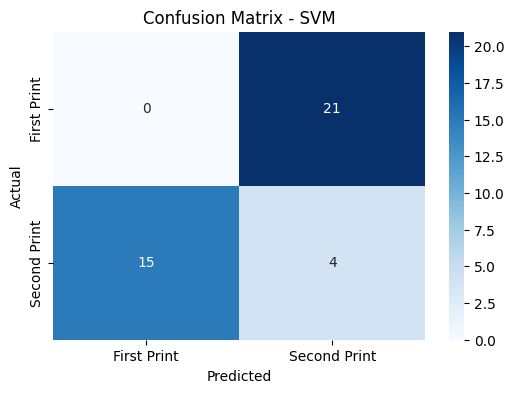

In [72]:
from sklearn.svm import SVC

svm_model = SVC(kernel='linear', C=1.0, random_state=42)
svm_model.fit(X_train, y_train)

svm_preds = svm_model.predict(X_test)
print("SVM Classification Report:\n", classification_report(y_test, svm_preds))

cm_svm = confusion_matrix(y_test, svm_preds)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Blues', xticklabels=['First Print', 'Second Print'],
            yticklabels=['First Print', 'Second Print'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - SVM')
plt.show()


In [73]:
from tensorflow.keras.preprocessing.image import img_to_array, load_img

IMG_SIZE = 128
first_print_path = '/content/drive/MyDrive/Assignment Data/First Print'
second_print_path = '/content/drive/MyDrive/Assignment Data/First Print'

def load_and_preprocess_images(img_folder, label):
    img_files = os.listdir(img_folder)
    data = []
    labels = []

    for img_name in img_files:
        img_path = os.path.join(img_folder, img_name)
        img = load_img(img_path, target_size=(IMG_SIZE, IMG_SIZE), color_mode='grayscale')
        img_array = img_to_array(img) / 255.0
        data.append(img_array)
        labels.append(label)

    return np.array(data), np.array(labels)

first_images, first_labels = load_and_preprocess_images(first_print_path, label=0)
second_images, second_labels = load_and_preprocess_images(second_print_path, label=1)

X_cnn = np.vstack([first_images, second_images])
y_cnn = np.hstack([first_labels, second_labels])

X_cnn = X_cnn.reshape(-1, IMG_SIZE, IMG_SIZE, 1)

np.save('data/X_cnn.npy', X_cnn)
np.save('data/y_cnn.npy', y_cnn)
print("CNN image data saved successfully!")

X_train_cnn, X_test_cnn, y_train_cnn, y_test_cnn = train_test_split(X_cnn, y_cnn, test_size=0.2, random_state=42)

y_train_cnn = to_categorical(y_train_cnn, num_classes=2)
y_test_cnn = to_categorical(y_test_cnn, num_classes=2)

print(f"CNN Training data shape: {X_train_cnn.shape}, Testing data shape: {X_test_cnn.shape}")


CNN image data saved successfully!
CNN Training data shape: (160, 128, 128, 1), Testing data shape: (40, 128, 128, 1)


In [74]:
cnn_model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(2, activation='softmax')
])

cnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
cnn_model.summary()
cnn_model.save('data/cnn_model.h5')
print("CNN model saved successfully!")

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)                    │ (None, 126, 126, 32)        │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 57600)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 128)                 │       7,372,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 2)                   │             258 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,392,002 (28.20 MB)

 Trainable params: 7,392,002 (28.20 MB)

 Non-trainable params: 0 (0.00 B)

CNN model saved successfully!


In [75]:
datagen = ImageDataGenerator(
    rotation_range=10,
    zoom_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1,
)

cnn_history = cnn_model.fit(
    datagen.flow(X_train_cnn, y_train_cnn, batch_size=32),
    validation_data=(X_test_cnn, y_test_cnn),
    epochs=10
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 7s 888ms/step - accuracy: 0.5136 - loss: 1.9202 - val_accuracy: 0.4750 - val_loss: 0.6969
Epoch 2/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 857ms/step - accuracy: 0.4924 - loss: 0.9849 - val_accuracy: 0.4750 - val_loss: 0.7374
Epoch 3/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 6s 1s/step - accuracy: 0.6008 - loss: 0.6774 - val_accuracy: 0.5250 - val_loss: 0.6925
Epoch 4/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 850ms/step - accuracy: 0.4872 - loss: 0.6963 - val_accuracy: 0.5250 - val_loss: 0.6928
Epoch 5/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 5s 887ms/step - accuracy: 0.5006 - loss: 0.6932 - val_accuracy: 0.5250 - val_loss: 0.6931
Epoch 6/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 7s 1s/step - accuracy: 0.4366 - loss: 0.6937 - val_accuracy: 0.5250 - val_loss: 0.6931
Epoch 7/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 818ms/step - accuracy: 0.4779 - loss: 0.6933 - val_accuracy: 0.5250 - val_loss: 0.6931
Epoch 8/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 5s 975ms/step - accuracy: 0.4748 - loss: 0.6932 - val_accuracy: 0.5250 - val_loss: 0.693

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - accuracy: 0.5375 - loss: 0.6931 
CNN Accuracy: 52.50%
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 260ms/step

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step
CNN Classification Report:
               precision    recall  f1-score   support

           0       0.53      1.00      0.69        21
           1       0.00      0.00      0.00        19

    accuracy                           0.53        40
   macro avg       0.26      0.50      0.34        40
weighted avg       0.28      0.53      0.36        40



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


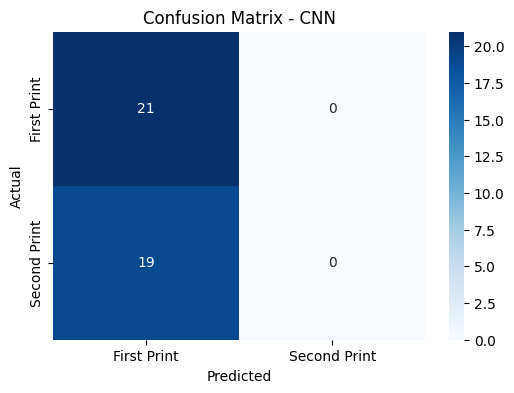

CNN metrics and predictions saved successfully!


In [76]:
cnn_loss, cnn_acc = cnn_model.evaluate(X_test_cnn, y_test_cnn)
print(f"CNN Accuracy: {cnn_acc * 100:.2f}%")

cnn_preds = np.argmax(cnn_model.predict(X_test_cnn), axis=1)
y_true_cnn = np.argmax(y_test_cnn, axis=1)

print("CNN Classification Report:\n", classification_report(y_true_cnn, cnn_preds))

cm_cnn = confusion_matrix(y_true_cnn, cnn_preds)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_cnn, annot=True, fmt='d', cmap='Blues', xticklabels=['First Print', 'Second Print'],
            yticklabels=['First Print', 'Second Print'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - CNN')
plt.show()

np.save('data/cnn_loss.npy', cnn_loss)
np.save('data/cnn_acc.npy', cnn_acc)
np.save('data/cnn_preds.npy', cnn_preds)

print("CNN metrics and predictions saved successfully!")

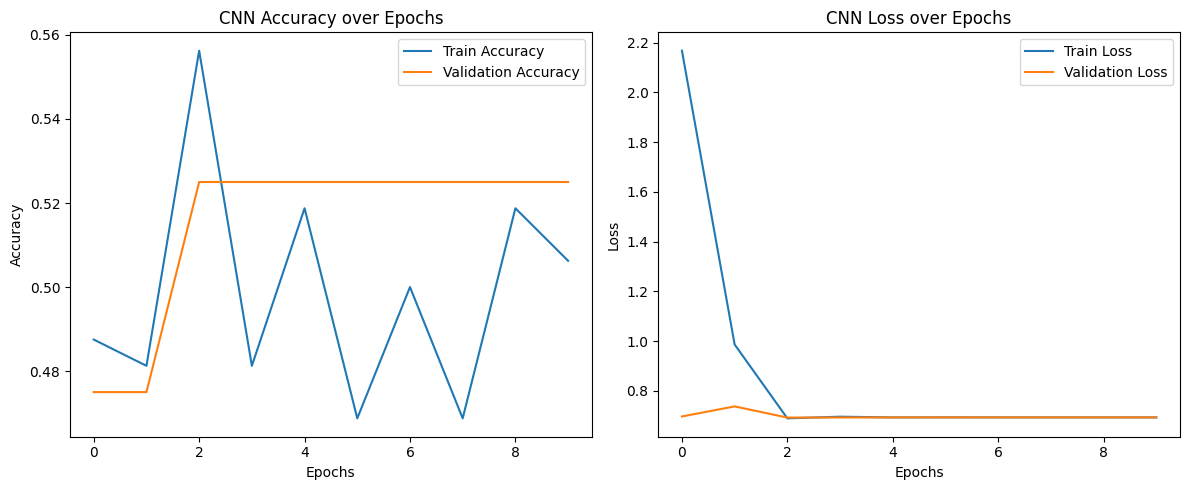

In [77]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(cnn_history.history['accuracy'], label='Train Accuracy')
plt.plot(cnn_history.history['val_accuracy'], label='Validation Accuracy')
plt.title('CNN Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(cnn_history.history['loss'], label='Train Loss')
plt.plot(cnn_history.history['val_loss'], label='Validation Loss')
plt.title('CNN Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


# **Model Evaluation and Optimization**

In [78]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    roc_curve,
    auc,
    precision_recall_curve,
)
from tensorflow.keras.models import load_model
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split


In [79]:
X_features = np.load('data/X_features.npy')
y_labels = np.load('data/y_labels.npy')

X_cnn = np.load('data/X_cnn.npy')
y_cnn = np.load('data/y_cnn.npy')

cnn_model = load_model('data/cnn_model.h5')
cnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
print("✅ CNN model loaded successfully!")


cnn_loss = np.load('data/cnn_loss.npy')
cnn_acc = np.load('data/cnn_acc.npy')

print(f"✅ Loaded CNN Loss: {cnn_loss:.4f}, CNN Accuracy: {cnn_acc:.2f}%")

X_train, X_test, y_train, y_test = train_test_split(
    X_features, y_labels, test_size=0.2, random_state=42
)

X_train_cnn, X_test_cnn, y_train_cnn, y_test_cnn = train_test_split(
    X_cnn, y_cnn, test_size=0.2, random_state=42
)


✅ CNN model loaded successfully!
✅ Loaded CNN Loss: 0.6931, CNN Accuracy: 0.52%


Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        21
           1       0.12      0.16      0.14        19

    accuracy                           0.07        40
   macro avg       0.06      0.08      0.07        40
weighted avg       0.06      0.07      0.07        40



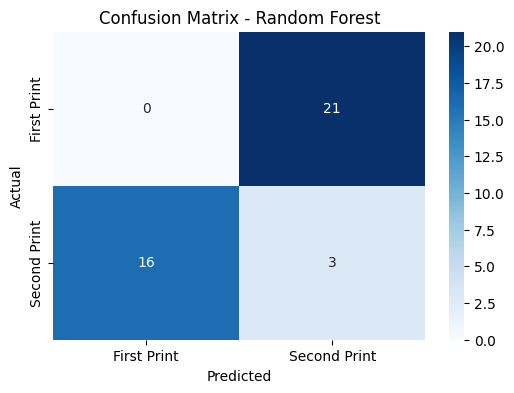

In [80]:
rf_model.fit(X_train, y_train)

rf_preds = rf_model.predict(X_test)
rf_probs = rf_model.predict_proba(X_test)[:, 1]

print("Random Forest Classification Report:\n", classification_report(y_test, rf_preds))
cm_rf = confusion_matrix(y_test, rf_preds)

plt.figure(figsize=(6, 4))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', xticklabels=['First Print', 'Second Print'],
            yticklabels=['First Print', 'Second Print'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Random Forest')
plt.show()


SVM Classification Report:
               precision    recall  f1-score   support

           0       0.10      0.10      0.10        21
           1       0.05      0.05      0.05        19

    accuracy                           0.07        40
   macro avg       0.08      0.07      0.07        40
weighted avg       0.08      0.07      0.08        40



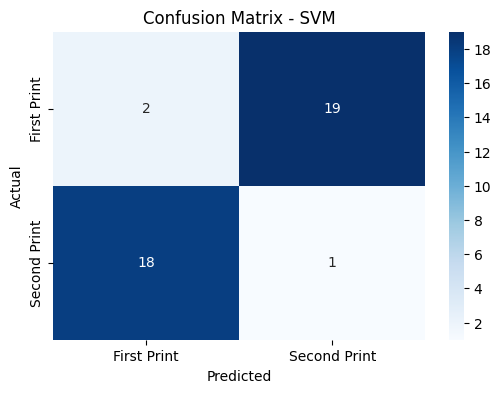

In [81]:
svm_model = SVC(kernel='linear', C=1.0, random_state=42, probability=True) # Added probability=True
svm_model.fit(X_train, y_train)

svm_preds = svm_model.predict(X_test)
svm_probs = svm_model.predict_proba(X_test)[:, 1]

print("SVM Classification Report:\n", classification_report(y_test, svm_preds))
cm_svm = confusion_matrix(y_test, svm_preds)

plt.figure(figsize=(6, 4))
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Blues', xticklabels=['First Print', 'Second Print'],
            yticklabels=['First Print', 'Second Print'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - SVM')
plt.show()

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 111ms/step - accuracy: 0.4625 - loss: 0.7159
CNN Accuracy: 47.50%
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 208ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


CNN Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        21
           1       0.47      1.00      0.64        19

    accuracy                           0.47        40
   macro avg       0.24      0.50      0.32        40
weighted avg       0.23      0.47      0.31        40



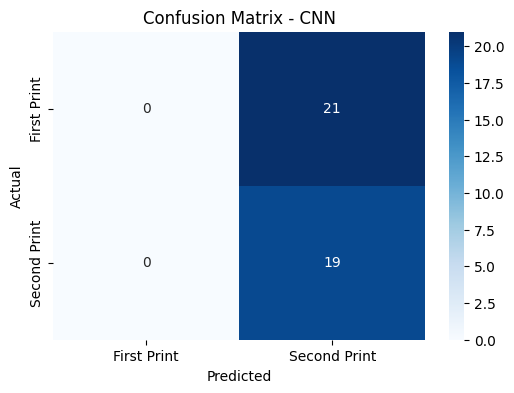

In [82]:
from tensorflow.keras.utils import to_categorical
y_test_cnn_encoded = to_categorical(y_test_cnn, num_classes=2)

cnn_loss, cnn_acc = cnn_model.evaluate(X_test_cnn, to_categorical(y_test_cnn, num_classes=2))
print(f"CNN Accuracy: {cnn_acc * 100:.2f}%")

cnn_preds = np.argmax(cnn_model.predict(X_test_cnn), axis=1)
y_true_cnn = y_test_cnn

print("CNN Classification Report:\n", classification_report(y_true_cnn, cnn_preds))
cm_cnn = confusion_matrix(y_true_cnn, cnn_preds)

plt.figure(figsize=(6, 4))
sns.heatmap(cm_cnn, annot=True, fmt='d', cmap='Blues', xticklabels=['First Print', 'Second Print'],
            yticklabels=['First Print', 'Second Print'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - CNN')
plt.show()


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step


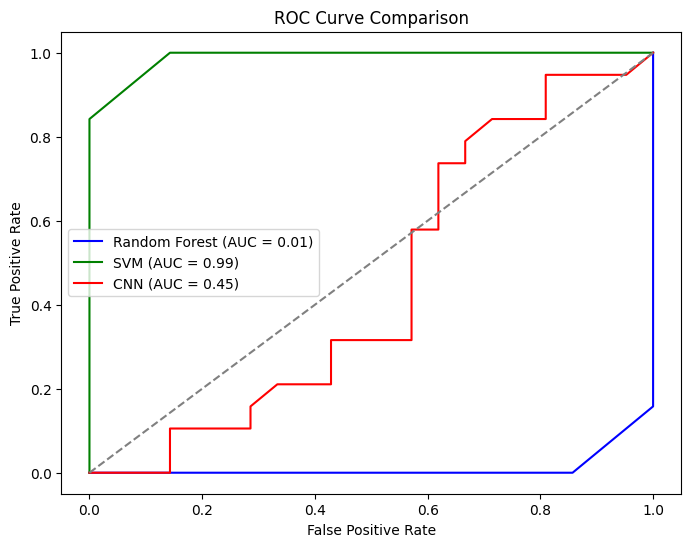

In [83]:
fpr_rf, tpr_rf, _ = roc_curve(y_test, rf_probs)
fpr_svm, tpr_svm, _ = roc_curve(y_test, svm_probs)
fpr_cnn, tpr_cnn, _ = roc_curve(y_true_cnn, cnn_model.predict(X_test_cnn)[:, 1])

auc_rf = auc(fpr_rf, tpr_rf)
auc_svm = auc(fpr_svm, tpr_svm)
auc_cnn = auc(fpr_cnn, tpr_cnn)

plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, label=f"Random Forest (AUC = {auc_rf:.2f})", color='blue')
plt.plot(fpr_svm, tpr_svm, label=f"SVM (AUC = {auc_svm:.2f})", color='green')
plt.plot(fpr_cnn, tpr_cnn, label=f"CNN (AUC = {auc_cnn:.2f})", color='red')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')

plt.title('ROC Curve Comparison')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


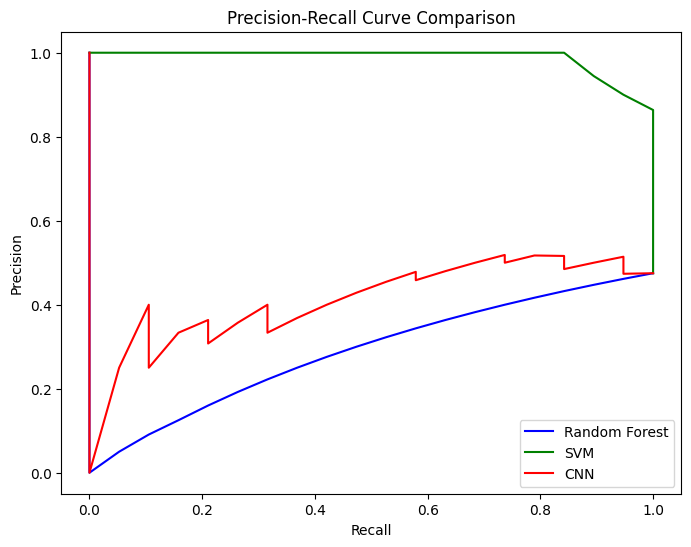

In [84]:
precision_rf, recall_rf, _ = precision_recall_curve(y_test, rf_probs)
precision_svm, recall_svm, _ = precision_recall_curve(y_test, svm_probs)
precision_cnn, recall_cnn, _ = precision_recall_curve(y_true_cnn, cnn_model.predict(X_test_cnn)[:, 1])

plt.figure(figsize=(8, 6))
plt.plot(recall_rf, precision_rf, label='Random Forest', color='blue')
plt.plot(recall_svm, precision_svm, label='SVM', color='green')
plt.plot(recall_cnn, precision_cnn, label='CNN', color='red')

plt.title('Precision-Recall Curve Comparison')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.show()


In [85]:
misclassified_rf = np.where(y_test != rf_preds)[0]
print(f"Number of misclassified samples by RF: {len(misclassified_rf)}")

misclassified_cnn = np.where(y_true_cnn != cnn_preds)[0]
print(f"Number of misclassified samples by CNN: {len(misclassified_cnn)}")


Number of misclassified samples by RF: 37
Number of misclassified samples by CNN: 21


In [86]:
from sklearn.model_selection import GridSearchCV

param_grid_rf = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
}

grid_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid_rf, cv=5, scoring='accuracy')
grid_rf.fit(X_train, y_train)

print(f"Best parameters for RF: {grid_rf.best_params_}")
print(f"Best accuracy for RF: {grid_rf.best_score_:.2f}")


Best parameters for RF: {'max_depth': None, 'min_samples_split': 10, 'n_estimators': 50}
Best accuracy for RF: 0.26


# **Final**

In [87]:
import numpy as np
import cv2
import os
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

X_features = np.load('data/X_features.npy')
y_labels = np.load('data/y_labels.npy')

X_cnn = np.load('data/X_cnn.npy')
y_cnn = np.load('data/y_cnn.npy')

X_train, X_test, y_train, y_test = train_test_split(X_features, y_labels, test_size=0.2, random_state=42)
X_train_cnn, X_test_cnn, y_train_cnn, y_test_cnn = train_test_split(X_cnn, y_cnn, test_size=0.2, random_state=42)

y_train_cnn = to_categorical(y_train_cnn, num_classes=2)
y_test_cnn = to_categorical(y_test_cnn, num_classes=2)

print(f"Shape of feature data: {X_features.shape}")
print(f"Shape of CNN data: {X_cnn.shape}")


Shape of feature data: (200, 410)
Shape of CNN data: (200, 128, 128, 1)


Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        21
           1       0.12      0.16      0.14        19

    accuracy                           0.07        40
   macro avg       0.06      0.08      0.07        40
weighted avg       0.06      0.07      0.07        40

Random Forest model saved successfully!


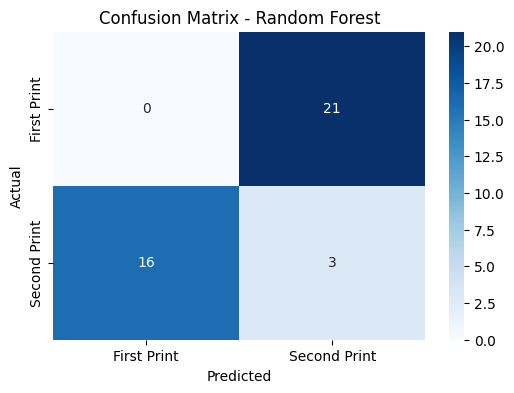

In [88]:
import os
import joblib
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

rf_preds = rf_model.predict(X_test)
print("Random Forest Classification Report:\n", classification_report(y_test, rf_preds))

os.makedirs('models', exist_ok=True)

joblib.dump(rf_model, 'models/rf_model.pkl')
print("Random Forest model saved successfully!")

cm_rf = confusion_matrix(y_test, rf_preds)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues',
            xticklabels=['First Print', 'Second Print'],
            yticklabels=['First Print', 'Second Print'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Random Forest')
plt.show()

SVM Classification Report:
               precision    recall  f1-score   support

           0       0.10      0.10      0.10        21
           1       0.05      0.05      0.05        19

    accuracy                           0.07        40
   macro avg       0.08      0.07      0.07        40
weighted avg       0.08      0.07      0.08        40

SVM model saved successfully!


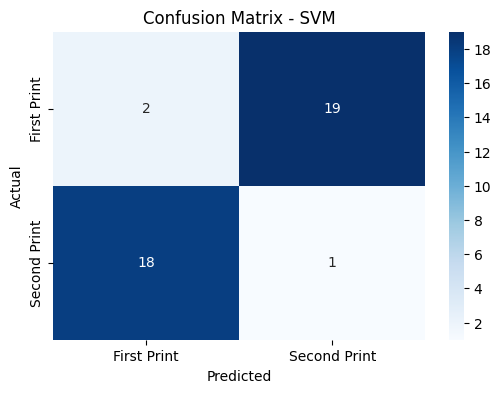

In [89]:
from sklearn.svm import SVC

svm_model = SVC(kernel='linear', probability=True, random_state=42)
svm_model.fit(X_train, y_train)

svm_preds = svm_model.predict(X_test)
print("SVM Classification Report:\n", classification_report(y_test, svm_preds))

joblib.dump(svm_model, 'models/svm_model.pkl')
print("SVM model saved successfully!")

cm_svm = confusion_matrix(y_test, svm_preds)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['First Print', 'Second Print'],
            yticklabels=['First Print', 'Second Print'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - SVM')
plt.show()

In [90]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

IMG_SIZE = 128

cnn_model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(2, activation='softmax')
])

cnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
cnn_model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)                    │ (None, 126, 126, 32)        │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_4 (Flatten)                  │ (None, 57600)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 128)                 │       7,372,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 2)                   │             258 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,392,002 (28.20 MB)

 Trainable params: 7,392,002 (28.20 MB)

 Non-trainable params: 0 (0.00 B)

In [91]:
cnn_history = cnn_model.fit(
    X_train_cnn, y_train_cnn,
    epochs=10,
    validation_data=(X_test_cnn, y_test_cnn),
    batch_size=32
)

cnn_model.save('models/cnn_model.h5')
print("CNN model saved successfully!")


Epoch 1/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 8s 1s/step - accuracy: 0.5012 - loss: 1.1032 - val_accuracy: 0.4750 - val_loss: 0.7339
Epoch 2/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 8s 828ms/step - accuracy: 0.5476 - loss: 0.7585 - val_accuracy: 0.4500 - val_loss: 0.6946
Epoch 3/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 6s 1s/step - accuracy: 0.4530 - loss: 0.6962 - val_accuracy: 0.4750 - val_loss: 0.6950
Epoch 4/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 784ms/step - accuracy: 0.4100 - loss: 0.6943 - val_accuracy: 0.3500 - val_loss: 0.6950
Epoch 5/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 5s 843ms/step - accuracy: 0.5191 - loss: 0.6932 - val_accuracy: 0.3250 - val_loss: 0.6950
Epoch 6/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 6s 1s/step - accuracy: 0.5379 - loss: 0.6927 - val_accuracy: 0.3250 - val_loss: 0.6953
Epoch 7/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 8s 773ms/step - accuracy: 0.5247 - loss: 0.6928 - val_accuracy: 0.3250 - val_loss: 0.6959
Epoch 8/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step - accuracy: 0.4810 - loss: 0.6926 - val_accuracy: 0.3500 - val_loss: 0.6965
Epoc

CNN model saved successfully!


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step
CNN Classification Report:
               precision    recall  f1-score   support

           0       0.37      0.33      0.35        21
           1       0.33      0.37      0.35        19

    accuracy                           0.35        40
   macro avg       0.35      0.35      0.35        40
weighted avg       0.35      0.35      0.35        40

Confusion Matrix - CNN:
 [[ 7 14]
 [12  7]]


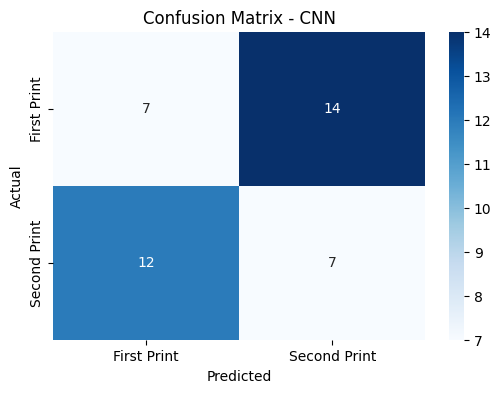

In [92]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

cnn_preds = np.argmax(cnn_model.predict(X_test_cnn), axis=1)
y_true_cnn = np.argmax(y_test_cnn, axis=1)

print("CNN Classification Report:\n", classification_report(y_true_cnn, cnn_preds))

cm_cnn = confusion_matrix(y_true_cnn, cnn_preds)
print("Confusion Matrix - CNN:\n", cm_cnn)

cm_cnn = confusion_matrix(y_true_cnn, cnn_preds)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_cnn, annot=True, fmt='d', cmap='Blues',
            xticklabels=['First Print', 'Second Print'],
            yticklabels=['First Print', 'Second Print'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - CNN')
plt.show()

In [93]:
import joblib

joblib.dump(rf_model, 'models/final_rf_model.pkl')
joblib.dump(svm_model, 'models/final_svm_model.pkl')

cnn_model.save('models/final_cnn_model.h5')

print("All models have been saved successfully!")


All models have been saved successfully!


In [94]:
rf_accuracy = rf_model.score(X_test, y_test)
svm_accuracy = svm_model.score(X_test, y_test)
cnn_loss, cnn_acc = cnn_model.evaluate(X_test_cnn, y_test_cnn)

print(f"Random Forest Accuracy: {rf_accuracy * 100:.2f}%")
print(f"SVM Accuracy: {svm_accuracy * 100:.2f}%")
print(f"CNN Accuracy: {cnn_acc * 100:.2f}%")


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - accuracy: 0.3479 - loss: 0.6983 
Random Forest Accuracy: 7.50%
SVM Accuracy: 7.50%
CNN Accuracy: 35.00%


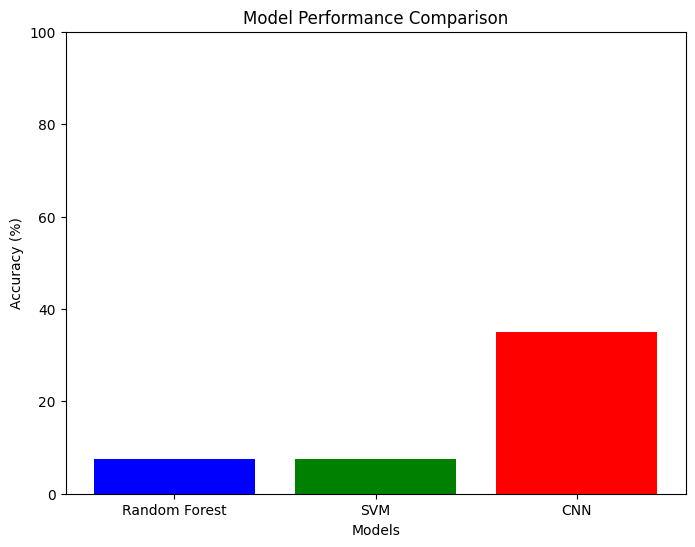

In [95]:
import matplotlib.pyplot as plt

accuracies = [rf_accuracy * 100, svm_accuracy * 100, cnn_acc * 100]
models = ['Random Forest', 'SVM', 'CNN']

plt.figure(figsize=(8, 6))
plt.bar(models, accuracies, color=['blue', 'green', 'red'])
plt.title('Model Performance Comparison')
plt.xlabel('Models')
plt.ylabel('Accuracy (%)')
plt.ylim(0, 100)
plt.show()
